## Image Histogram

An image histogram acts as a graphical representation of the frequency distribution in a digital image. It plots the number of pixels for each frequency value.Basically it is a graph of pixel intensity (on the x-axis) versus number of pixels (on the y-axis). The x-axis indicates the range of values the variable can take. This range can be divided into a series of intervals called **bins**. The y-axis shows the count of how many values fall within that interval or bin.By looking at the histogram for a specific image a viewer will be able to judge the entire frequency distribution at a glance.

In [1]:
# Loading libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

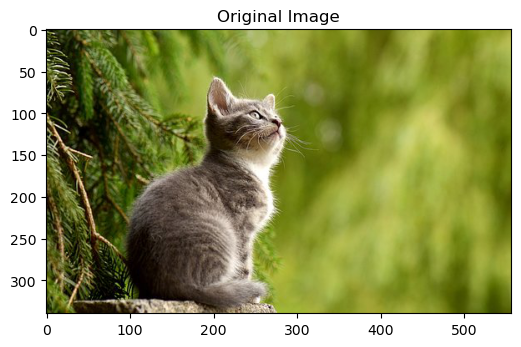

In [2]:
# Showing Original Image
def catImageShow(img,title):
#     channel conversion
    image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6,8))
    plt.imshow(img)
    plt.title(title)

    # Display all open figures.
    plt.show()
    
image_original = plt.imread('../input/cat-image/cat-2083492__340.jpg')
catImageShow(image_original, "Original Image")

In [3]:
argumentImage = {
    "src":"../input/cat-image/cat-2083492__340.jpg",
    "scharr":0
}

### Histogram

Using **Split()** , the order of the output vector of arrays depends on the order of channels of the input image

In [4]:
# channel splitting - B(blue),G(green),R(red)
color_channel = cv2.split(image_original)

In [5]:
cv2.split(image_original)

(array([[ 28,  48,  41, ..., 159, 160, 159],
        [ 14,   8,  11, ..., 160, 161, 161],
        [150, 107,  40, ..., 163, 164, 164],
        ...,
        [ 28,  46,  76, ...,  85,  86,  87],
        [ 19,  41,  77, ...,  84,  84,  85],
        [ 20,  39,  71, ...,  83,  83,  84]], dtype=uint8),
 array([[ 47,  66,  57, ..., 163, 164, 163],
        [ 31,  24,  24, ..., 164, 165, 165],
        [165, 120,  50, ..., 167, 168, 168],
        ...,
        [ 52,  70,  96, ...,  94,  96,  97],
        [ 43,  65,  97, ...,  93,  94,  95],
        [ 44,  63,  91, ...,  92,  93,  94]], dtype=uint8),
 array([[  0,  16,  12, ...,  53,  54,  53],
        [  0,   0,   0, ...,  54,  55,  55],
        [132,  90,  25, ...,  57,  58,  58],
        ...,
        [  4,   8,  24, ...,   5,   7,  10],
        [  0,   3,  25, ...,   4,   5,   8],
        [  0,   1,  19, ...,   3,   4,   7]], dtype=uint8))

In [6]:
# for B=0
# cv.calcHist(	images, channels=[0,1,2], mask, histSize, ranges[, hist[, accumulate]]	) 
hist = cv2.calcHist([image_original],[0],None,[256],[0,256])
hist

array([[ 440.],
       [ 165.],
       [ 111.],
       [ 221.],
       [ 218.],
       [ 259.],
       [ 294.],
       [ 270.],
       [ 298.],
       [ 328.],
       [ 359.],
       [ 355.],
       [ 373.],
       [ 370.],
       [ 419.],
       [ 402.],
       [ 378.],
       [ 430.],
       [ 400.],
       [ 410.],
       [ 465.],
       [ 395.],
       [ 449.],
       [ 440.],
       [ 440.],
       [ 444.],
       [ 424.],
       [ 441.],
       [ 412.],
       [ 448.],
       [ 445.],
       [ 471.],
       [ 469.],
       [ 480.],
       [ 483.],
       [ 499.],
       [ 495.],
       [ 471.],
       [ 513.],
       [ 481.],
       [ 521.],
       [ 512.],
       [ 483.],
       [ 504.],
       [ 495.],
       [ 525.],
       [ 493.],
       [ 464.],
       [ 514.],
       [ 496.],
       [ 562.],
       [ 542.],
       [ 523.],
       [ 555.],
       [ 557.],
       [ 534.],
       [ 505.],
       [ 517.],
       [ 507.],
       [ 506.],
       [ 521.],
       [ 550.],
       [

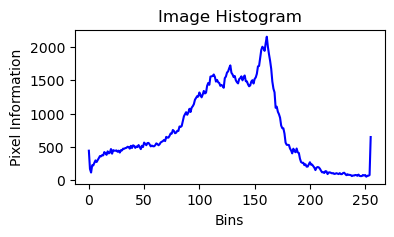

In [7]:
plt.figure(figsize=(4,2))
plt.title("Image Histogram")
plt.xlabel("Bins")
plt.ylabel("Pixel Information")
# line graph
plt.plot(hist,color='b')
plt.show()

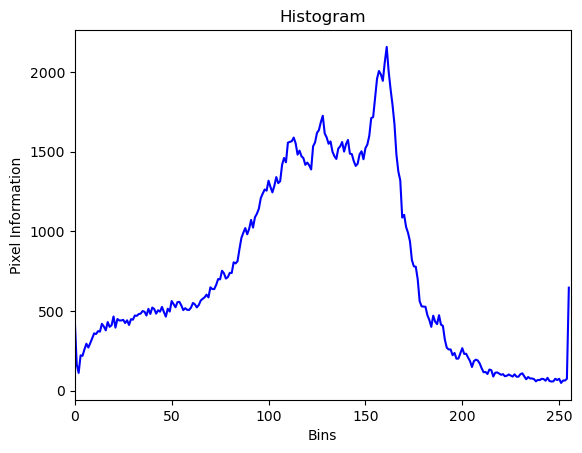

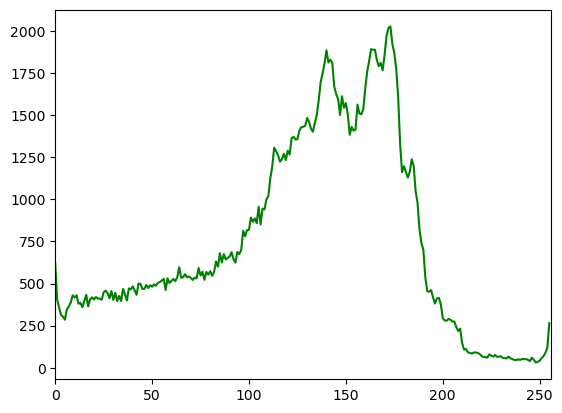

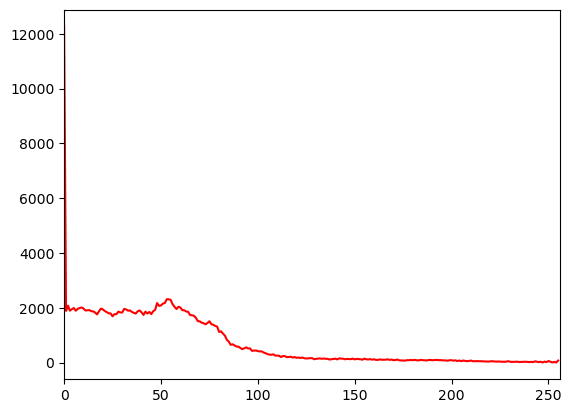

In [8]:
# image color channel
def imageHistogram(img, title, mask=None):
    channel= cv2.split(img)
    color_com = ('b','g','r')
#     plt.figure(figsize=(4,3))
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel('Pixel Information')
    
    for (ch,color_com) in zip(channel,color_com):
        hist = cv2.calcHist([ch],[0],mask,[256],[0,256])
        plt.plot(hist, color=color_com)
        plt.xlim([0,256])
        plt.show()

imageHistogram(image_original,"Histogram")

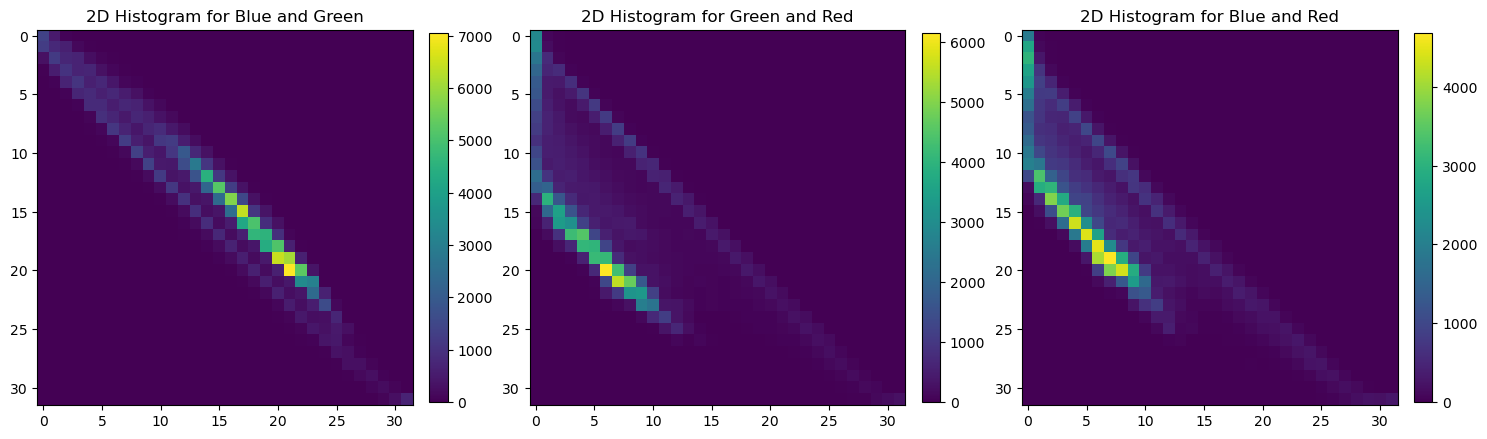

Image Shape: (32, 32) with 1024


In [9]:
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(131)
hist = cv2.calcHist([image_original], [0,1], None, [32,32], [0,256,0,256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Histogram for Blue and Green", fontsize=12)
plt.colorbar(p, fraction=0.045, pad=0.04)


# fig = plt.figure(figsize=(2,4))
ax = fig.add_subplot(132)
hist = cv2.calcHist([image_original], [1,2], None, [32,32], [0,256,0,256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Histogram for Green and Red", fontsize=12)
plt.colorbar(p,  fraction=0.045, pad=0.04)


# fig = plt.figure(figsize=(2,4))
ax = fig.add_subplot(133)
hist = cv2.calcHist([image_original], [0,2], None, [32,32], [0,256,0,256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Histogram for Blue and Red", fontsize=12)
plt.colorbar(p,  fraction=0.045, pad=0.04)

plt.show()
print("Image Shape: {} with {}".format(hist.shape,hist.flatten().shape[0]))

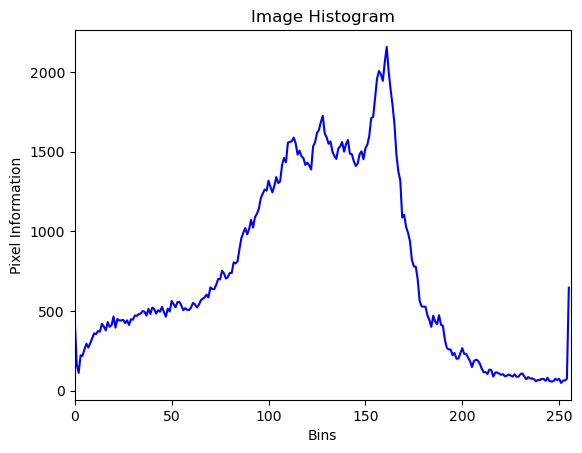

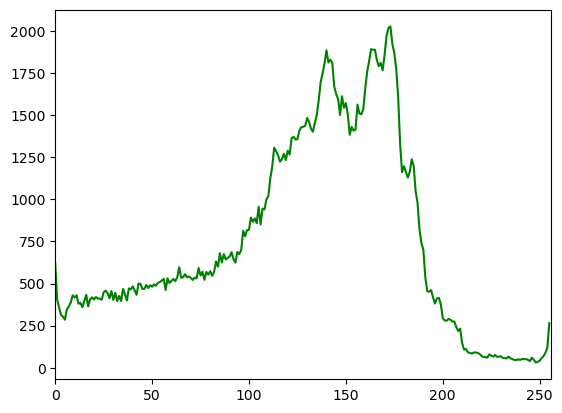

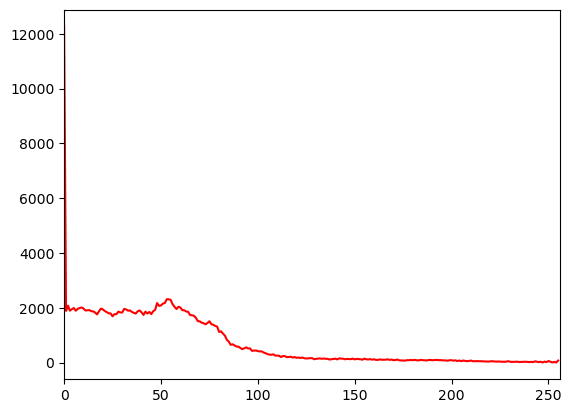

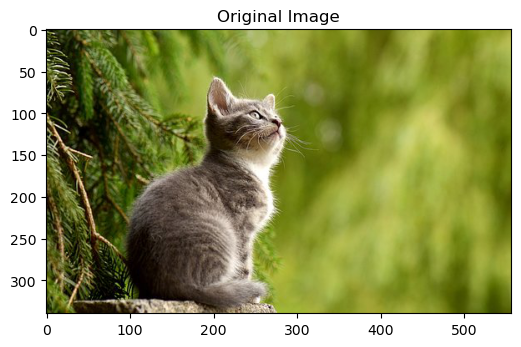

In [10]:
imageHistogram(image_original,'Image Histogram')
catImageShow(image_original,"Original Image")

In [11]:
np.zeros(image_original.shape[:2], dtype="uint8")

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

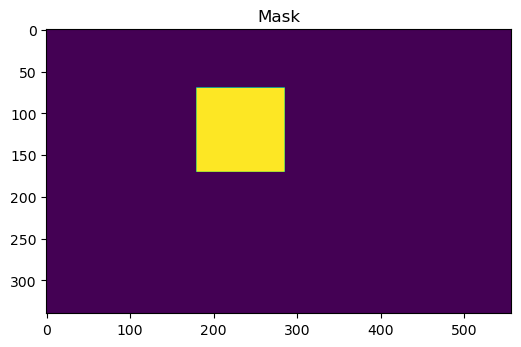

In [12]:
mask = np.zeros(image_original.shape[:2], dtype="uint8")
# cv2.rectangle(image, start_point, end_point, color, thickness)
cv2.rectangle(mask, (285,170), (180,70), 255, -1)
catImageShow(mask, "Mask")

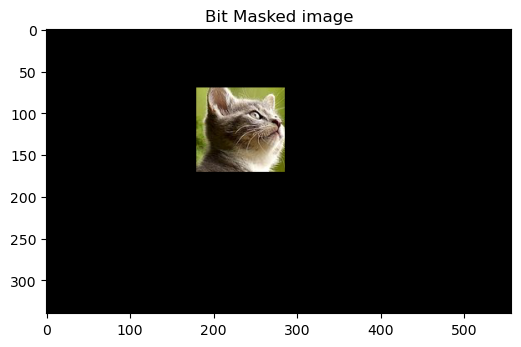

In [13]:
# arithmetic operation of two images and applied mask
bit_mask = cv2.bitwise_and(image_original,image_original,mask=mask)
catImageShow(bit_mask,"Bit Masked image")

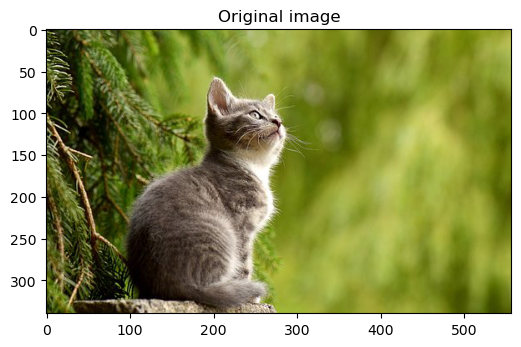

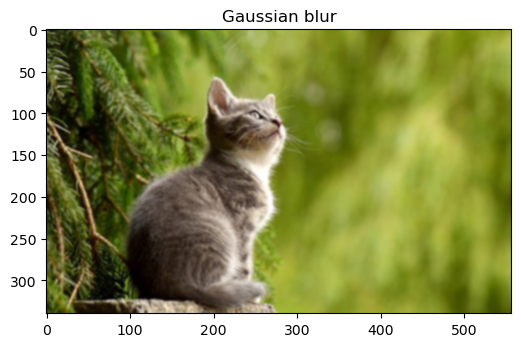

In [14]:
image_gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
image_blur = cv2.GaussianBlur(image_original, (5,5), 0)

catImageShow(image_original, "Original image")

catImageShow(image_blur, "Gaussian blur")

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. It was developed by John F. Canny in 1986.

Canny Edge detection is an Algorithm consisting of 4 major steps:
1. Reduce Noise using Gaussian Smoothing.
2. Compute image gradient using Sobel filter.
3. Apply Non-Max Suppression or NMS to just jeep the local maxima
4. Finally, apply Hysteresis thresholding which that 2 threshold values T_upper and T_lower which is used in the Canny() function.

The algorithm is based on grayscale pictures. Therefore, the pre-requisite is to convert the image to grayscale before

Aperture_size is used to specify the order of the Sobel filter used to calculate the gradient in the Canny algorithm. The default value is 3 and its value should be odd between 3 and 7. You can increase the Aperture size when you want to detect more detailed features.

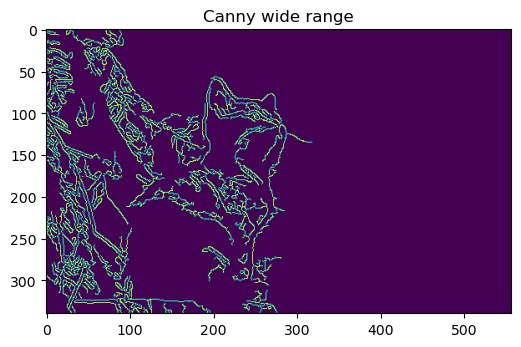

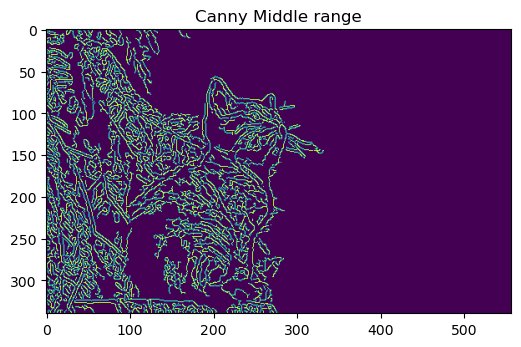

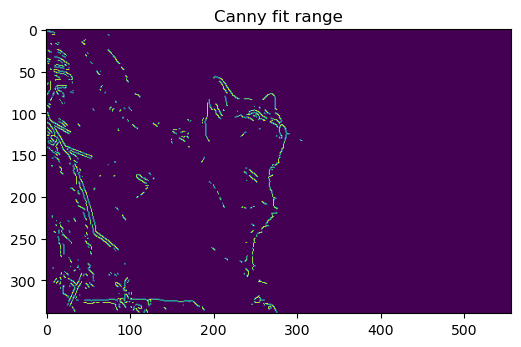

In [15]:
# cv2.Canny(image, T_lower, T_upper, aperture_size, L2Gradient)
cannyBlurWide = cv2.Canny(image_blur,20,250)
cannyBlurMiddle = cv2.Canny(image_blur,15,120)
cannyBlurFit = cv2.Canny(image_blur,240,250)  

catImageShow(cannyBlurWide, "Canny wide range")
catImageShow(cannyBlurMiddle, "Canny Middle range")
catImageShow(cannyBlurFit, "Canny fit range")